In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# df = pd.DataFrame({'input': np.array([1, 2, 3, 4, 5]), 'output': np.array([2, 4, 6, 8, 10])})
# df
x = np.array([1, 2, 3, 4, 5])   # input
y = np.array([2, 4, 6, 8, 10]) # output (y = 2x)

In [ ]:
m=0.0
b=0.0
learning_rate=0.1
epochs=1000
n=len(x)

In [ ]:
def loss_function(y_true,y_pred):
  return np.mean((y_true,y_pred)**2)

In [ ]:
def loss_function(y_true, y_pred):
  return np.mean((y_true - y_pred)**2)

for i in range(epochs):
  y_pred=m*x + b

  dm=(-2/n)*np.sum(x*(y-y_pred))
  db=(-2/n)*np.sum(y-y_pred)

  m=m-learning_rate * dm
  b=b-learning_rate * db

  if i % 100 == 0:
        loss = loss_function(y, y_pred)
        print(f"Epoch {i}: Loss = {loss:.4f}, m = {m:.4f}, b = {b:.4f}")

Epoch 0: Loss = 82.0800, m = -1.6000, b = -0.4800
Epoch 100: Loss = 103811106263082960568084070400.0000, m = -123330892487526.4844, b = -34160679601824.5859
Epoch 200: Loss = 131367622609140066540475301681476657583850614586525876224.0000, m = -4387267701946847193200590848.0000, b = -1215202803375439554625404928.0000
Epoch 300: Loss = 166238978575594503148587893120954133108806813763030937175148189837396490234191937536.0000, m = -156068909421800971687601545845502451384320.0000, b = -43228585336828378133206935579626127228928.0000
Epoch 400: Loss = 210366888347221829186928819149795488137061373522434821511426713349775586298980510348084408087295940424852570112.0000, m = -5551861920188201752787598781898091494234853685730476032.0000, b = -1537776727499951494391909277178824832306733710214955008.0000
Epoch 500: Loss = 266208491486660627211405158186088128842665334399855885162038028516376612357727726159528229690578055884597145352420372608400001709797015552.0000, m = -197497188229407391090647344066

In [ ]:
print("Final model:")
print(f"y = {m:.2f}x + {b:.2f}")


Final model:
y = 8234950588634319497605415668203946966921234135553593031072838365866035052637965820081302877383305588865857300679866264669691092548976640.00x + 2280949265194369795840967540936296917778898699297608606222116272860384387556917422668663216850560424057985720576543090989677163311005696.00


In [ ]:
# Step 1: Generate some sample data (y = 2x + 1 with some noise)
np.random.seed(0)
x=2*np.random.rand(100,1)
y=2*x+1+np.random.randn(100,1)

In [ ]:
# Step 3: Define the gradient descent function
def compute_cost(x,y,old_slope,intercept):
  m=len(x)
  predictions=old_slope*x+intercept
  cost=(1/(2*m))*np.sum((predictions-y)**2)  #MSE
  return cost

In [ ]:
def gradient_descent(x,y,old_slope,intercept,learning_rate=0.1,num_interation=1000):
  m=len(x)
  cost_history=[]

  for i in range(num_interation):
    slop_gradient=(1/m)*np.sum((old_slope * x+intercept-y)*x)
    intercept_gradient=(1/m)*np.sum((old_slope*x + intercept-y))

    # update the perameters
    new_slope=old_slope - learning_rate*slop_gradient
    new_intercept=intercept - learning_rate*intercept_gradient

    # compute ans store the gradient at each iteration
    cost_history.append(compute_cost(x,y,old_slope,intercept))

    # Update old_slope and intercept for the next iteration
    old_slope,intercept=new_slope,new_intercept

  return new_slope,new_intercept,cost_history

In [ ]:
# Step 4: Prepare the data for gradient descent
X_b = np.c_[np.ones((len(x), 1)), x]  # Add a column of ones to X (for the intercept term)


In [ ]:
# Step 5: Initialize slope (old_slope) and intercept
old_slope = np.random.randn(1)  # Random initial value for slope
intercept = np.random.randn(1)  # Random initial value for intercept

In [ ]:
# Step 6: Run gradient descent (moved to plotting cell for dependency management)
# new_slope, new_intercept, cost_history = gradient_descent(x, y, old_slope, intercept, learning_rate=0.1, num_interation=1000)

In [ ]:
# Step 6: Run gradient descent (moved here to ensure cost_history is defined before plotting)
new_slope, new_intercept, cost_history = gradient_descent(x, y, old_slope, intercept, learning_rate=0.1, num_interation=1000)

# Step 7: Plot the cost history (to see how the cost decreases)
plt.plot(range(1000), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function During Gradient Descent')
plt.show()

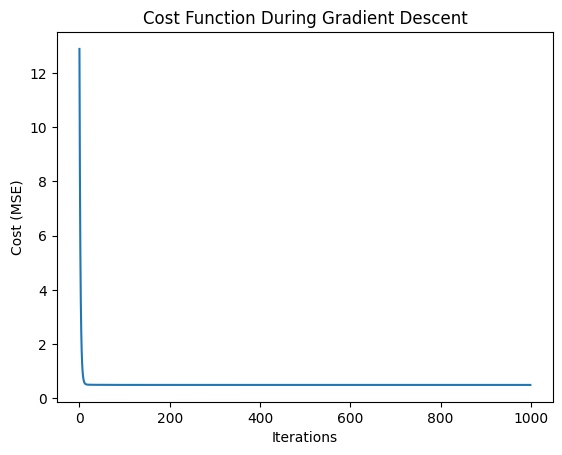

In [ ]:
# Step 7: Plot the cost history (to see how the cost decreases)
plt.plot(range(1000), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function During Gradient Descent')
plt.show()

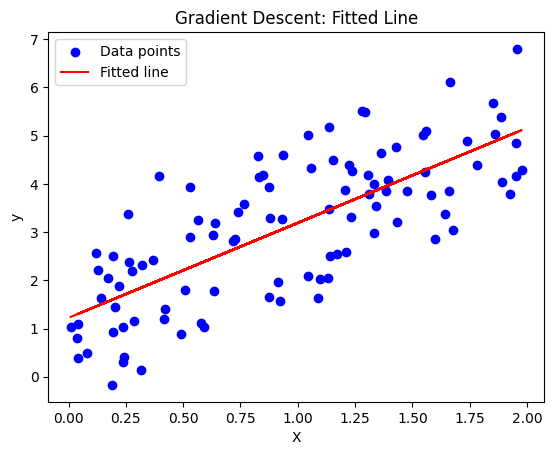

Optimal slope: [1.96846753]
Optimal intercept: [1.22215105]


In [ ]:
# Step 8: Plot the data and the learned line
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, new_slope * x + new_intercept, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Descent: Fitted Line')
plt.legend()
plt.show()

# Final optimal parameters (slope and intercept)
print("Optimal slope:", new_slope)
print("Optimal intercept:", new_intercept)